Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.
Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



Target Variable == Survival	(0 = No, 1 = Yes)
Predictor Variables == passengers’ gender(Sex: Male, Female) and class(Pclass:A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower)




1. Introduction
2. Domain Info
3. Loading necassary Libraries
4. Loading datasets (Combining train and test data sets, cos the target variable, Survived is missing in the test data
5. Checking for missing values
6. 

In [103]:
#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
#Importing the data sets, Reading Csv files. Train
train = pd.read_csv('C:/Users/HP/Desktop/Desktop/Data Science Projects/Ay/Kaggle/Titanic/Data/train.csv')
train 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [105]:
#Importing the data sets, Reading Csv files. Test
test = pd.read_csv('C:/Users/HP/Desktop/Desktop/Data Science Projects/Ay/Kaggle/Titanic/Data/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [106]:
# shape of tha data. The training part contains information about 891 passengers, described by 12 variables, including 1 
#target variable. The testing part contains 418 observations, i.e information about passengers, described by 11 variables 
#(the test dataset doesn't contain target value.)
#Combine test and train data into one "all_data" DataFrame.
#To do so, I create a sequence of DataFrame objects and use pandas concat method. Terget values of testing data in resulting 
#dataset will be NaN. Check the shape of the result DataFrame and take a look at the first 4 rows:

print('Train shape: ', train.shape)
print('Test shape: ', test.shape)

Train shape:  (891, 12)
Test shape:  (418, 11)


In [107]:
#Combining train and test data sets
all_data = pd.concat([train, test], axis = 0, ignore_index = True, sort = False)
all_data
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
print('All_data shape: ', all_data.shape)

All_data shape:  (1309, 12)


5. First look: variables, NAs
5.1 Variables
From the data overview of the competition, we have a description of each variable:

PassengerId - unique identifier
Survived:
  0 = No
  1 = Yes
Pclass: Ticket class
  1 = 1st, Upper
  2 = 2nd, Middle
  3 = 3rd, Lower
  
Name: full name with a title
Sex: gender
Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
Sibsp: Number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:
  Sibling = brother, sister, stepbrother, stepsister
  Spouse = husband, wife (mistresses and fiancés were ignored)
Parch: Number of parents / children aboard the Titanic. The dataset defines family relations in this way:
  Parent = mother, father
  Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them.
  Ticket: Ticket number.
Fare: Passenger fare.
Cabin: Cabin number.
Embarked: Port of Embarkation:
  C = Cherbourg
  Q = Queenstown
  S = Southampton


In [109]:
#5.2 Types of the variables. Survival is now float instead of integer. But I can ignore it for now since it will not affect EDA
#Age and Fare are continuous numeric variables.
#Pclass is integer, but in fact it is categorical variable, represented by 3 numbers.
#After previous manipulations, Survived variable has type 'float', it's not correct, since it's categorical variable too, but 
#it will not influence my EDA process, so I will let it be float for now.

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [110]:
# check data for NA values
all_data_NA = all_data.isna().sum()
train_NA = train.isna().sum()
test_NA = test.isna().sum()

pd.concat([train_NA, test_NA, all_data_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA', 'All NA'])

#There are overall 263 missing Age values, 1 missing Fare, 1014 NAs in Cabin variable, and 2 in Embarked variable.
#418 NA in Survived variable due to the absence of this information in the test dataset. I will not impute these missings in 
#the current notebook :) So, when I will use this variable for visualization, there will be information only for the training 
#part of the data.

#In this notebook I will do some missing data handling for the combined dataset. But in the second part of my work (ML solution) 
#this should be done based on what we know only about training data, to avoid any data leakage.

,Train NA,Test NA,All NA
PassengerId,0,0.0,0
Survived,0,NaN,418
Pclass,0,0.0,0
Name,0,0.0,0
Sex,0,0.0,0
Age,177,86.0,263
SibSp,0,0.0,0
Parch,0,0.0,0
Ticket,0,0.0,0
Fare,0,1.0,1


In [111]:
#Checking for sum of null values . 
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

6. Exploring the data

6.1 Survivals - target value
Let's calculate and visualise distribution of our target variable - 'Survived'.
A countplot of seaborn module is a very useful way to show the counts of observations in each category.
Since we have target only for the training part, these numbers don't include all passengers.

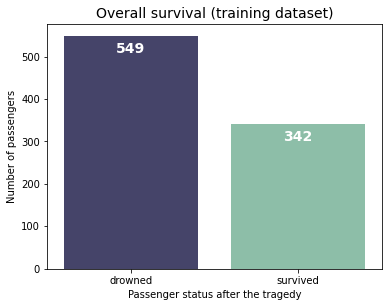

In [112]:
# set size of the plot
plt.figure(figsize=(6, 4.5)) 

# countplot shows the counts of observations in each categorical bin using bars.
# x - name of the categorical variable
ax = sns.countplot(x = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"])

# set the current tick locations and labels of the x-axis.
plt.xticks( np.arange(2), ['drowned', 'survived'] )
# set title
# set title
plt.title('Overall survival (training dataset)',fontsize= 14)
# set x label
plt.xlabel('Passenger status after the tragedy')
# set y label
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Survived'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

In [113]:
#We have 891 passengers in train dataset, 549 (61.6%) of them drowned and only 342 (38.4%) survived.
#But we know, that lifeboats could carry 53% of total passengers.
all_data['Survived'].value_counts(normalize = True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

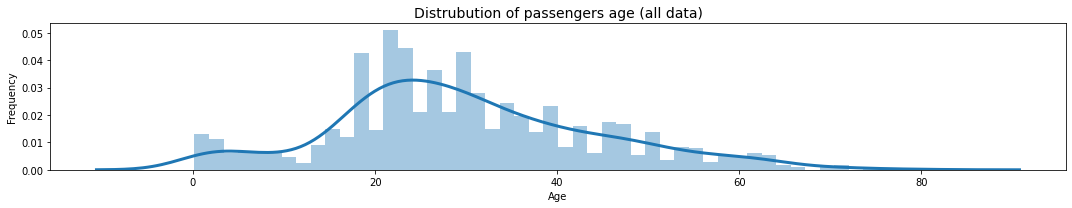

In [114]:
#6.2 AGE
#What was the age of passengers, how it correlated with chances to survive, and how it varies depending on class and sex.

#6.2.1 Age distribution
#We have 263 missing values:

#177 missing in the training dataset
#86 in the test dataset
#Overall age distribution (seaborn distplot) and descriptive statistics:

# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(all_data[(all_data["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

In [115]:
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
age_distr = pd.DataFrame(all_data['Age'].describe())
# Transpose index and columns.
age_distr.transpose()

#The distribution of Age is slightly right skewed. The Age vary from about 0.17 year to 80 years with mean = 29.88, 
#and there don't seem to be any obvious outliers, but we will check it.

,count,mean,std,min,25%,50%,75%,max
Age,1046.0,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0


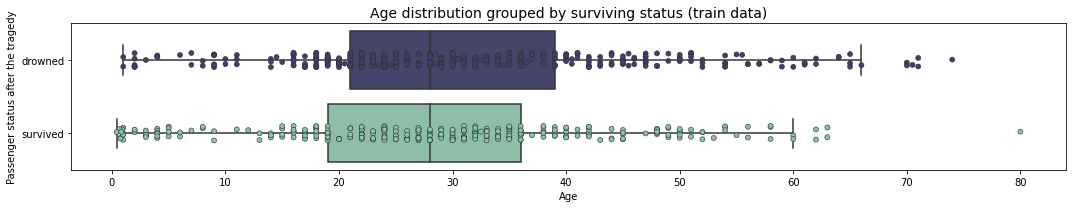

In [116]:
#6.2.2 Age by surviving status
#Did age had a big influence on chances to survive?
#To visualize two age distributions, grouped by surviving status I am using boxlot and stripplot showed together:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data = train,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data = train,
   linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

In [117]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [118]:
all_data[all_data['Age'] == max(all_data['Age'] )]
#Actually, Mr Algernon Henry Barkworth was born on 4 June 1864.He was 48 in 1912 and died in 1945 at 80 y.o.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [119]:
train.loc[train['PassengerId'] == 631, 'Age'] = 48
all_data.loc[all_data['PassengerId'] == 631, 'Age'] = 48

Let's update our description:
The mean age of survived passenger is 28.23 which on 2.39 smaller than the mean age of drowned passengers (only passengers we know survived status for).= The maximum age of survived passenger is 63 y.o.
It looks like there is a slightly bigger chance to survive for younger people.

6.2.3 Age by class
There I will compare three age distributions, grouped by class of the passenger.
As visualisations I will use 2 gaphs:

boxplot+stripplot as before
kdeplot, to plot age density curves for each class. This method can't handle missing values, so I filter the data before using it.

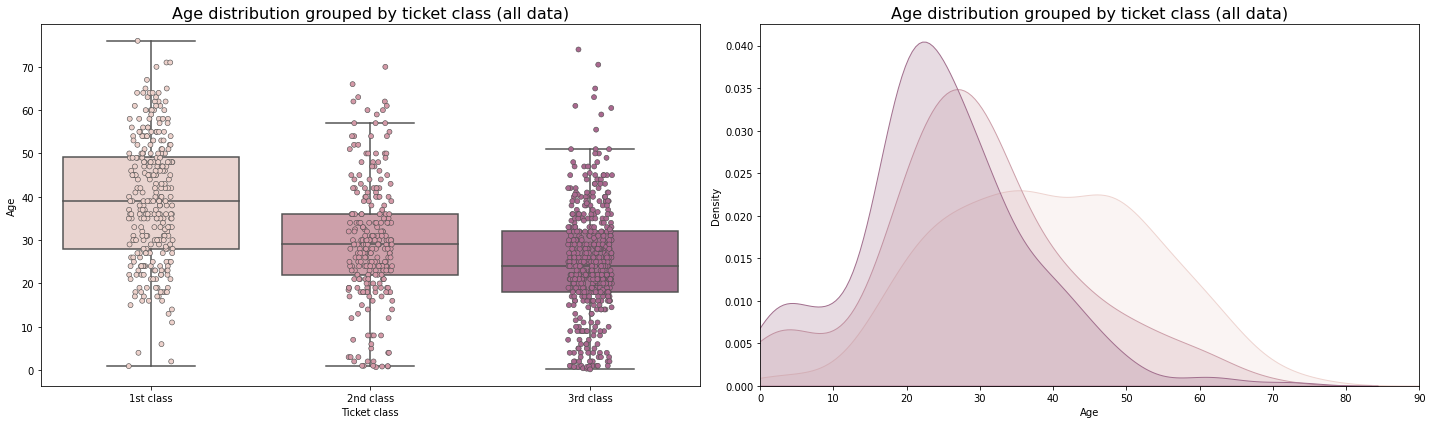

In [120]:
# set size
plt.figure(figsize=(20, 6))

# set palette
palette = sns.cubehelix_palette(5, start = 3)

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Pclass', y = 'Age', data = all_data,
     palette = palette, fliersize = 0)

sns.stripplot(x = 'Pclass', y = 'Age', data = all_data,
     linewidth = 0.6, palette = palette)
plt.xticks( np.arange(3), ['1st class', '2nd class', '3rd class'])
plt.title('Age distribution grouped by ticket class (all data)',fontsize= 16)
plt.xlabel('Ticket class')


plt.subplot(1, 2, 2)

# To use kdeplot I need to create variables with filtered data for each category
age_1_class = all_data[(all_data["Age"] > 0) & 
                              (all_data["Pclass"] == 1)]
age_2_class = all_data[(all_data["Age"] > 0) & 
                              (all_data["Pclass"] == 2)]
age_3_class = all_data[(all_data["Age"] > 0) & 
                              (all_data["Pclass"] == 3)]

# Ploting the 3 variables that we create
sns.kdeplot(age_1_class["Age"], shade=True, color='#eed4d0', label = '1st class')
sns.kdeplot(age_2_class["Age"], shade=True,  color='#cda0aa', label = '2nd class')
sns.kdeplot(age_3_class["Age"], shade=True,color='#a2708e', label = '3rd class')
plt.title('Age distribution grouped by ticket class (all data)',fontsize= 16)
plt.xlabel('Age')
plt.xlim(0, 90)
plt.tight_layout()
plt.show()

In [121]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Pclass')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,284.0,39.047254,14.353217,0.92,28.0,39.0,49.25,76.0
2,261.0,29.506705,13.638627,0.67,22.0,29.0,36.00,70.0
3,501.0,24.816367,11.958202,0.17,18.0,24.0,32.00,74.0


1st class has wider distribution compare to 2nd and 3rd and almost symmetric.
Both 2nd and 3rd classes age distributions are right skewed.
The youngest passenger has 3rd class ticket, age = 0.17.
The oldest passenger has 1st class ticket, age = 76.
3rd class mean age = 24.8, 2nd classe average age is 29.5 and 1st class average age is 39.1.

Since survived passengers on average younger than drowned, does it mean, that 3rd class passengers had more chances to survive? We will discover it later.

From graphs we can see difference in age distribution between classes. So when I will do missing data imputation I will take class into account.

6.2.4 Age vs class vs gender
Comparison of age distribution by gender I will do separately for each class since we have such a noticeable age difference between classes.

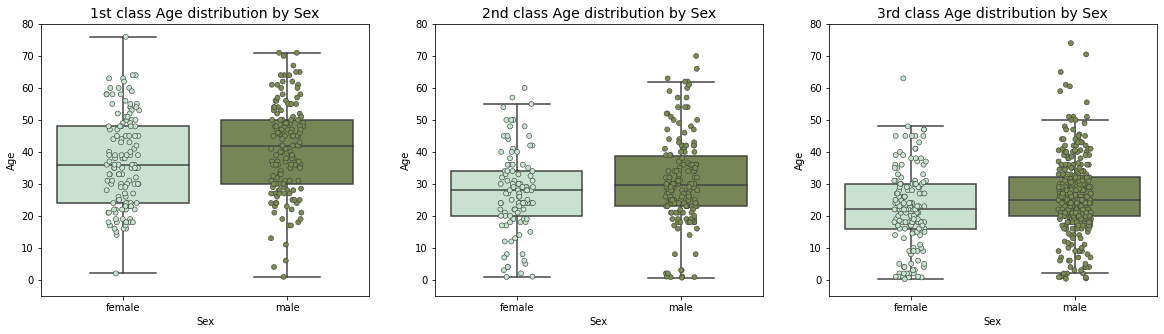

In [122]:
plt.figure(figsize=(20, 5))
palette = sns.cubehelix_palette(3, start = 1)

plt.subplot(1, 3, 1)
sns.boxplot(x = 'Sex', y = 'Age', data = age_1_class,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_1_class,
     linewidth = 0.6, palette = palette)
plt.title('1st class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 2)
sns.boxplot(x = 'Sex', y = 'Age', data = age_2_class,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_2_class,
     linewidth = 0.6, palette = palette)
plt.title('2nd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 3)
sns.boxplot(x = 'Sex', y = 'Age',  data = age_3_class,
     order = ['female', 'male'], palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_3_class,
     order = ['female', 'male'], linewidth = 0.6, palette = palette)
plt.title('3rd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.show()

In [123]:
# Descriptive statistics:
age_1_class_stat = pd.DataFrame(age_1_class.groupby('Sex')['Age'].describe())
age_2_class_stat = pd.DataFrame(age_2_class.groupby('Sex')['Age'].describe())
age_3_class_stat = pd.DataFrame(age_3_class.groupby('Sex')['Age'].describe())

pd.concat([age_1_class_stat, age_2_class_stat, age_3_class_stat], axis=0, sort = False, keys = ['1st', '2nd', '3rd'])

count       mean        std   min   25%   50%    75%   max
    Sex                                                               
1st female  133.0  37.037594  14.272460  2.00  24.0  36.0  48.00  76.0
    male    151.0  40.817351  14.236835  0.92  30.0  42.0  50.00  71.0
2nd female  103.0  27.499223  12.911747  0.92  20.0  28.0  34.00  60.0
    male    158.0  30.815380  13.977400  0.67  23.0  29.5  38.75  70.0
3rd female  152.0  22.185329  12.205254  0.17  16.0  22.0  30.00  63.0
    male    349.0  25.962264  11.682415  0.33  20.0  25.0  32.00  74.0

The oldest and the youngest passengers are female.
In each class the average Age of female are slightly less than the average Age of male passengers.

6.3 What is in the name?
Each passenger Name value contains the title of the passenger which we can extract and discover.
To create new variable "Title":

I am using method 'split' by comma to divide Name in two parts and save the second part
I am splitting saved part by dot and save first part of the result
To remove spaces around the title I am using 'split' method
To visualize, how many passengers hold each title, I chose countplot.

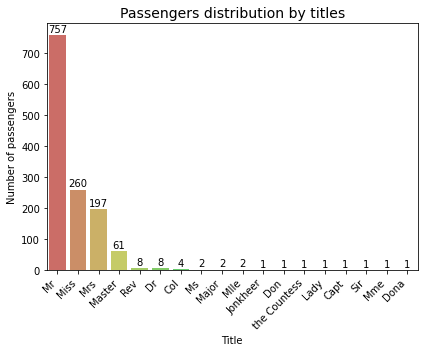

In [124]:
all_data['Title'] = all_data['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')

plt.figure(figsize=(6, 5))
ax = sns.countplot( x = 'Title', data = all_data, palette = "hls", order = all_data['Title'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Passengers distribution by titles',fontsize= 14)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Title'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

The most frequent title among passangers is Mister (Mr.) - general title or respect of an adult male. The second title by its frequency is Miss (unmarried woman), the third - Mrs. (married woman).
Other titles are less frequent, I will discover if I can combine them into particular groups. I am going to use titles as a fiture, but if they split the data too much, leaving just a few observations in each group, it can lead to overfitting. And for a general understanding of the data, it will be more convenient to put titles in clearer groups.

Master - By the late 19th century, etiquette dictated that men be addressed as Mister, and
boys as Master.
Mme - Madame. a French title of respect equivalent to “Mrs.”, used alone or prefixed to a woman's married name or title. I will add to "Mrs".
Mlle - Mademoiselle is a French courtesy title, abbreviated Mlle, traditionally given to an unmarried woman. The equivalent in English is "Miss". I will add to "Miss" group.
Dr. - Doctor is an academic title
Rev. - Reverend, is usually a courtesy title for Protestant Christian ministers or pastors.
"Military" group of titles:

Capt. -Captain is a title for the commander of a military unit
Major is a military rank of commissioned officer status
Col. - The honorary title of Colonel is conferred by several states in the US and certain military units of the Commonwealth of Nations
"Honor" group of titles:

Sir - is a formal English honorific address for men. Sir is used for men titled knights i.e. of orders of chivalry, and later also to baronets, and other offices.
the Countess - is a historical title of nobility
Lady - a formal title in the United Kingdom. A woman with a title of nobility or honorary
Jonkheer - is an honorific in the Low Countries denoting the lowest rank within the nobility.
Don - is an honorific prefix primarily used in Spain and the former Spanish Empire, Italy, Portugal, the Philippines, Latin America, Croatia, and Goa. (male)
Dona - Feminine form for don (honorific) a Spanish, Portuguese, southern Italian, and Filipino title, given as a mark of respect
Not sure about the title Ms,we have only 2 passengers with this title, I will convert it to Miss.

I created a dictionary of titles and I am using method "map" to create variable "Title_category".

In [125]:
all_data[all_data['Title']=='Ms']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
443,444,1.0,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.00,NaN,S,Ms
979,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Ms


In [126]:
title_dict = {  'Mr':     'Mr',
                'Mrs':    'Mrs',
                'Miss':   'Miss',
                'Master': 'Master',
              
                'Ms':     'Miss',
                'Mme':    'Mrs',
                'Mlle':   'Miss',
              'Capt':   'military',
                'Col':    'military',
                'Major':  'military',

                'Dr':     'Dr',
                'Rev':    'Rev',
                  
                'Sir':    'honor',
                'the Countess': 'honor',
                'Lady':   'honor',
                'Jonkheer': 'honor',
              'Don':    'honor',
                'Dona':   'honor' }

# map titles to category
all_data['Title_category'] = all_data['Title'].map(title_dict)
 

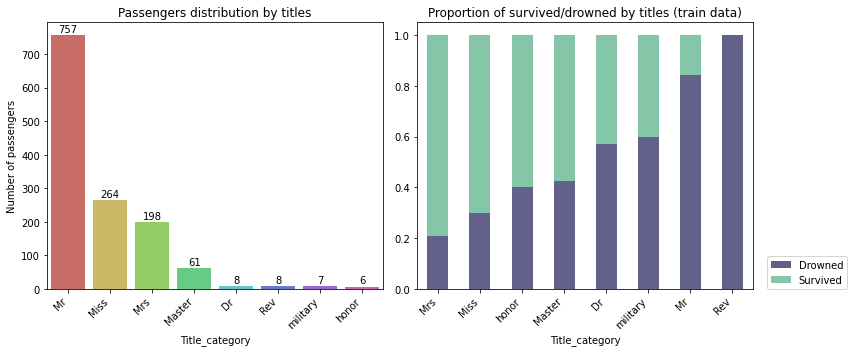

In [127]:
fig = plt.figure(figsize=(12, 5))


ax1 = fig.add_subplot(121)
ax = sns.countplot(x = 'Title_category', data = all_data, palette = "hls", order = all_data['Title_category'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Passengers distribution by titles',fontsize= 12)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Title_category'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    plt.tight_layout()

ax2 = fig.add_subplot(122)
surv_by_title_cat = all_data.groupby('Title_category')['Survived'].value_counts(normalize = True).unstack()
surv_by_title_cat = surv_by_title_cat.sort_values(by=1, ascending = False)
surv_by_title_cat.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.legend( ( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(
    rotation=45, horizontalalignment='right',
    fontweight='light'  
)


plt.title('Proportion of survived/drowned by titles (train data)',fontsize= 12)

plt.tight_layout()
plt.show()

The smallest group is "honor", passengers with royal-kind titles.
Training data:

The biggiest proportion of survivals is in "Mrs" group - married woman.
More than 80% drowned in "Mr." group.
Nobody survived among Reverend group.

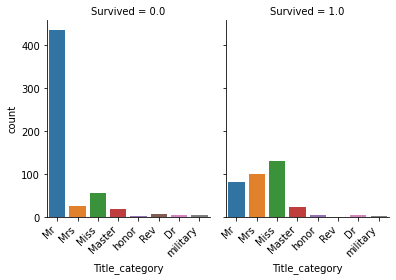

In [128]:
category_survived = sns.catplot(x="Title_category",  col="Survived",
                data = all_data, kind="count",
                height=4, aspect=.7)

category_survived.set_xticklabels(rotation=45, 
    horizontalalignment='right',
    fontweight='light')
plt.tight_layout()

If we consider the survivors not by percentage within each group but by comparing the number of survivors between groups, then "Miss" title category is the luckiest one. The "Mr" category lost the biggest number of passengers.

Let's also visualize, how Title categories and ticket classes are related:

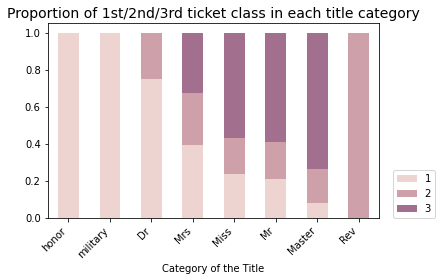

In [129]:
class_by_title_cat = all_data.groupby('Title_category')['Pclass'].value_counts(normalize = True)
class_by_title_cat = class_by_title_cat.unstack().sort_values(by = 1, ascending = False)
class_by_title_cat.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'])
plt.legend(loc=(1.04,0))
_ = plt.xticks(
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light'  
)


plt.title('Proportion of 1st/2nd/3rd ticket class in each title category',fontsize= 14)
plt.xlabel('Category of the Title')
plt.tight_layout()

All honor and military titles occupied the 1st class.
All Reverends occupied 2nd class.
The biggest percent of the 3rd class is in the Master category.
For sure, there is a relationship between variables, and survival was influenced not only by the title itself but by a 
combination of factors that are to some extent interrelated. How class could relate on surviving? Let's go further and discover.

From the number of the cabin we can extract first letter, which will tell us about placement of the cabin on the ship! And it seems to me as a very important knowlege:

How close cabin located to the lifeboats
How far from the most damaged parts of the ship
How close to people who have information about what is happening and how to act
How many obstacles passenger had in the way to the lifeboat
I found some description of each Titanic deck:

There were 8 decks: the upperdeck - for lifeboats, other 7 were under it and had letter symbols:

A: it did not run the entire length of the vessel (i.e. it did not reach from the stern to the bow of the vessel), and was intended for passengers of the 1st class.
B: it did not run the entire length of the ship (it was interrupted by 37 meters above the C de
id not run the entire length of the ship (it was interrupted by 37 meters above the C deck, and served as a place for anchors in the front).
C: in the front part of the galley, dining room for the crew, as well as a walking area for passengers of the 3rd class.
D: a walking area for passengers .
E: cabins of the 1st and 2nd class.
F: part of the passenger cabins of the 2nd class, most of the cabins of the 3rd class.
G: did not run the entire length of the ship, the boiler rooms were located in the center.
T - boat deck ?
To the passengers without deck information I will imput U letter (as unknown).

In [130]:
all_data['deck'] = all_data['Cabin'].str.split('', expand = True)[1]
all_data.loc[all_data['deck'].isna(), 'deck'] = 'U'
print('Unique deck letters from the cabin numbers:', all_data['deck'].unique())

Unique deck letters from the cabin numbers: ['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


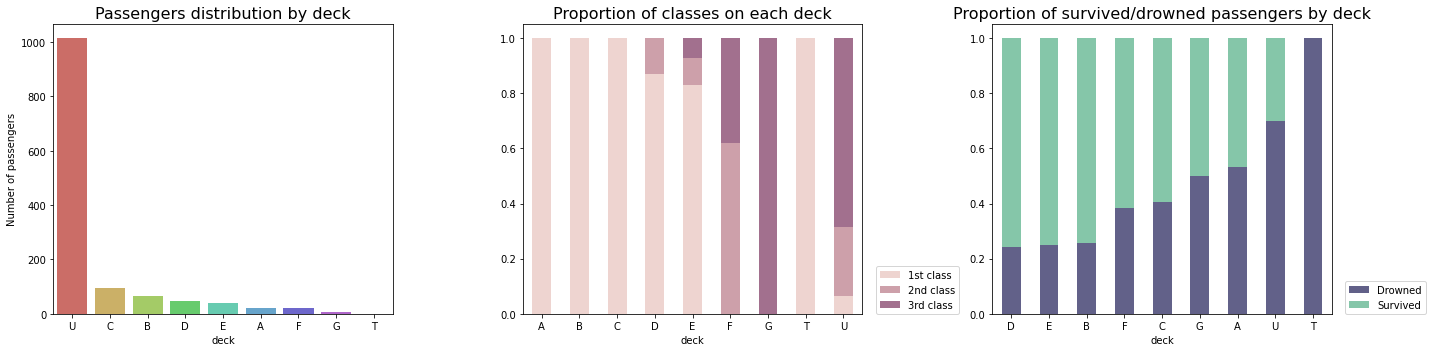

In [131]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
sns.countplot(x = 'deck', data = all_data, palette = "hls", order = all_data['deck'].value_counts().index, ax = ax1)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(132)
deck_by_class = all_data.groupby('deck')['Pclass'].value_counts(normalize = True).unstack()
deck_by_class.plot(kind='bar', stacked='True',color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of classes on each deck',fontsize= 16)
plt.xticks(rotation = False)

ax3 = fig.add_subplot(133)
deck_by_survived = all_data.groupby('deck')['Survived'].value_counts(normalize = True).unstack()
deck_by_survived = deck_by_survived.sort_values(by = 1, ascending = False)
deck_by_survived.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax3)
plt.title('Proportion of survived/drowned passengers by deck',fontsize= 16)
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)
plt.tight_layout()

plt.show()

Most passengers don't have cabin numbers ('U').
The largest part of passengers with known cabin numbers were located on the 'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor.
The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'.
Deck A was the closest to the deck with lifeboats, but it is the last in surviving rate (except unknown and T deck). How did it happen?

In [132]:
all_data[(all_data['deck']=='A') & (all_data['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck
96,97,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr,Mr,A
174,175,0.0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,Mr,Mr,A
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,Mr,Mr,A
284,285,0.0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,Mr,Mr,A
475,476,0.0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,Mr,Mr,A
583,584,0.0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C,Mr,Mr,A
806,807,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,Mr,Mr,A
867,868,0.0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,Mr,Mr,A


I was curious, so I read a bit about some of these passengers:
John Hugo Ross When he boarded on 10 April 1912, he was so ill from dysentery he had to be carried to his cabin on a stretcher. When Ross was told the ship had struck an iceberg and that he should get dressed, Ross refused to believe the trouble serious. "Is that all,?" he told Peuchen. "It will take more than an iceberg to get me off this ship." Presumably, Ross drowned in his bed.

Andrews, Mr. Thomas Jr was a managing director of H&W (built the Titanic) in charge of designing and was familiar with every detail of the construction of the firm's ships. He helped to evacuate people.

Roebling, Mr. Washington Augustus II helped to evacuate people as well.

It is obvious that there is no algorithm that can predict the survival rate by 100 percent based on the factors of the passenger's location on the ship or his age, since the human factor and the unpredicted emergensy were involved in the rescue process.

For training process it will be better to include passenger from T deck to the A deck group.

6.5 Family
Does the size of the family on Board together affect the chances of surviving a disaster? Does
having children increase the chance of getting into a boat, or is it easier to survive being single?
I calculate the family size, by summarizing the number of siblings with the parch number plus 1 (passenger himself).
Family size = sib + parch + 1

In [133]:
#6.5.1 Calculate family size
all_data['Family_size'] = all_data['SibSp'] + all_data['Parch'] + 1
family_size = all_data['Family_size'].value_counts()
print('Family size and number of passengers:')
print(family_size)

Family size and number of passengers:
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64


Looks strange that there are 16 passengers with family size of 7, for example. Let's check!
Also, I will add a surname variable, by extraxting first word ow the name.



In [134]:
all_data['Surname'] = all_data['Name'].str.split(',', expand = True)[0]

size 7
Group people with family size = 7 by Surname
We have 9 Andersons, who have family size of 7

In [135]:
all_data[all_data['Family_size'] == 7]['Surname'].value_counts()

Andersson    9
Asplund      7
Name: Surname, dtype: int64

In [136]:
all_data[(all_data['Family_size'] == 7) & (all_data['Surname']=='Andersson')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Mr,Mr,U,7,Andersson
68,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.925,NaN,S,Miss,Miss,U,7,Andersson
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
541,542,0.0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
542,543,0.0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
610,611,0.0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,Mrs,Mrs,U,7,Andersson
813,814,0.0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
850,851,0.0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,Master,Master,U,7,Andersson
1105,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S,Miss,Miss,U,7,Andersson


Let's group Andersons with 7-size family by ticket number.
There are 7 of them used the same ticket and travelled together. 5 children (each of them has 4 siblings) and 2 parents. To passengers used separated tickets.

In [137]:
all_data[(all_data['Family_size'] == 7) & (all_data['Surname']=='Andersson')].Ticket.value_counts()

347082     7
347091     1
3101281    1
Name: Ticket, dtype: int64

In [138]:
all_data[(all_data['Ticket'] == '3101281') | (all_data['Ticket'] == '347091')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
68,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.925,NaN,S,Miss,Miss,U,7,Andersson
1105,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S,Miss,Miss,U,7,Andersson


Looks like they actually traveled alone, I will correct that data.

In [139]:
all_data.loc[all_data['PassengerId'] == 69, ['SibSp', 'Parch', 'Family_size']] = [0,0,1]
all_data.loc[all_data['PassengerId'] == 1106, ['SibSp','Parch', 'Family_size']] = [0,0,1]
all_data[(all_data['Ticket'] == '3101281') | (all_data['Ticket'] == '347091')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
68,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,0,0,3101281,7.925,NaN,S,Miss,Miss,U,1,Andersson
1105,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,0,0,347091,7.775,NaN,S,Miss,Miss,U,1,Andersson


size 5
There are some inconsistencies in other categories, with fewer relatives.
Let's check people with 5-size family and group them by Surname:

In [140]:
all_data[all_data['Family_size'] == 5]['Surname'].value_counts()

Ryerson          5
Ford             5
Palsson          5
Lefebre          5
Kink-Heilmann    1
Hocking          1
Name: Surname, dtype: int64

In [141]:
all_data[(all_data['Surname'] == 'Kink-Heilmann')&(all_data['Family_size'] == 5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
1285,1286,NaN,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.025,NaN,S,Mr,Mr,U,5,Kink-Heilmann


Kink-Heilmann, Mr. Anton had 2 other siblings on the ship unlike his wife, for whom these relatives do not fit the description of relatives in the data set. We will assume that all other "mismatches" in the groups are similar to this. Since I plan to group the size of families into groups, this will eliminate possible inconsistencies.

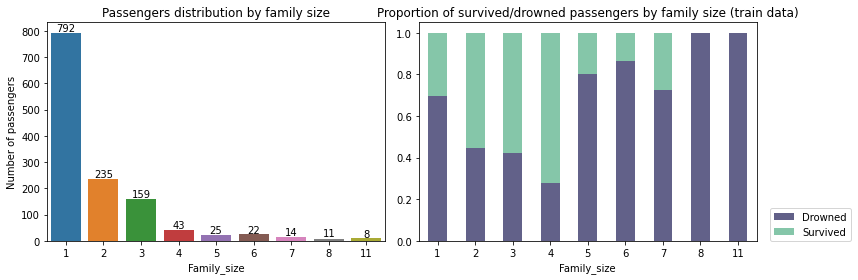

In [142]:
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(all_data['Family_size'], ax = ax1)

# calculate passengers for each category
labels = (all_data['Family_size'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = all_data.groupby('Family_size')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

In [143]:
all_data['Family_size_group'] = all_data['Family_size'].map(lambda x: 'f_single' if x == 1 
                                                            else ('f_usual' if 5 > x >= 2 
                                                                  else ('f_big' if 8 > x >= 5 
                                                                       else 'f_large' )
                                                                 ))      

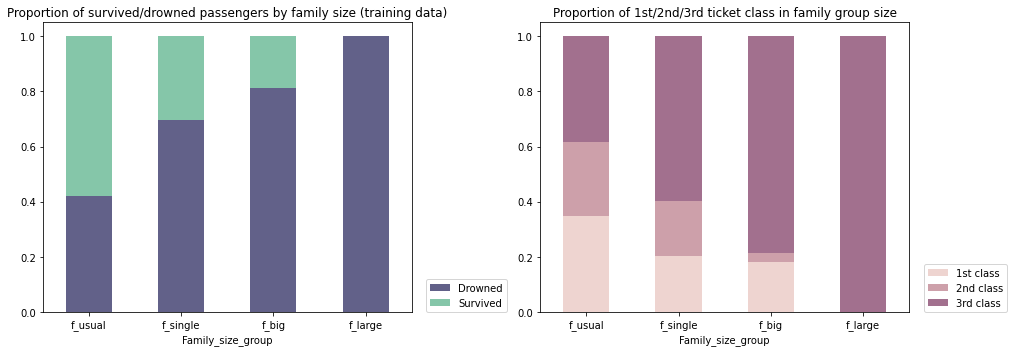

In [144]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(121)
d = all_data.groupby('Family_size_group')['Survived'].value_counts(normalize = True).unstack()
d = d.sort_values(by = 1, ascending = False)
d.plot(kind='bar', stacked='True', color = ["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Proportion of survived/drowned passengers by family size (training data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax2 = fig.add_subplot(122)
d2 = all_data.groupby('Family_size_group')['Pclass'].value_counts(normalize = True).unstack()
d2 = d2.sort_values(by = 1, ascending = False)
d2.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of 1st/2nd/3rd ticket class in family group size')
_ = plt.xticks(rotation=False)

plt.tight_layout()

Large families are all from 3rd class and no one from the training part of the dataset is survived.
The biggest proportion of the 1st class in the usual size of the family and the proportion of survivors in the usual family is the biggest.

6.6 Class¶
We have made a lot of assumptions about the survival rate depending on the classes. Let's now look closely at this variable.

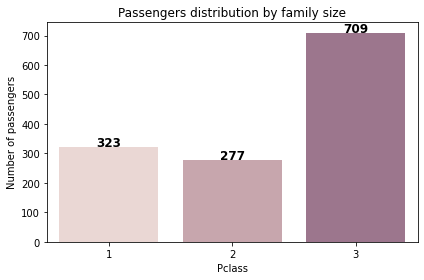

In [145]:
ax = sns.countplot(all_data['Pclass'], palette = ['#eed4d0', '#cda0aa', '#a2708e'])
# calculate passengers for each category
labels = (all_data['Pclass'].value_counts(sort = False))
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')
    
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')
plt.tight_layout()

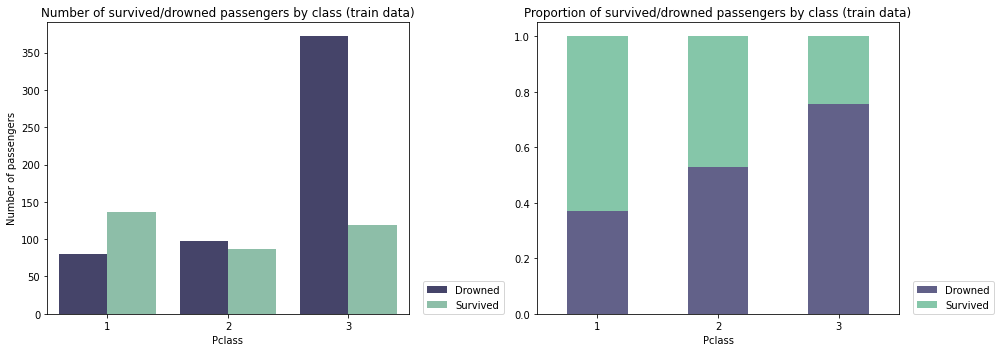

In [146]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)
sns.countplot(x = 'Pclass', hue = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Number of survived/drowned passengers by class (train data)')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax2 = fig.add_subplot(122)
d = all_data.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax2, color =["#3f3e6fd1", "#85c6a9"])
plt.title('Proportion of survived/drowned passengers by class (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

Despite the previously identified prerequisites (on average, older people are more likely to die, and in the first class, the average age is higher than in other classes. Also, passengers on deck A, which consists of 100% first class, have a large proportion of drowned passengers), the first class has the largest number of survivors and the proportion of survivors within the class is the largest.
Third-class tickets had the highest number of drowned passengers, and most of the third-class passengers drowned.

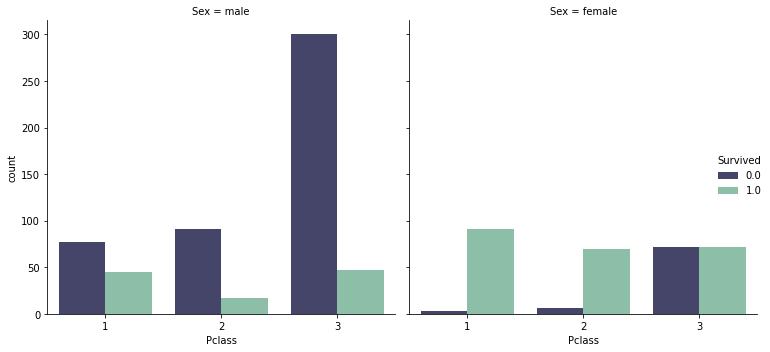

In [147]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = all_data , palette=["#3f3e6fd1", "#85c6a9"])

plt.tight_layout()

However, most of the male passengers of the first class drowned, and the female almost all survived. In the third grade, half of the female survived.

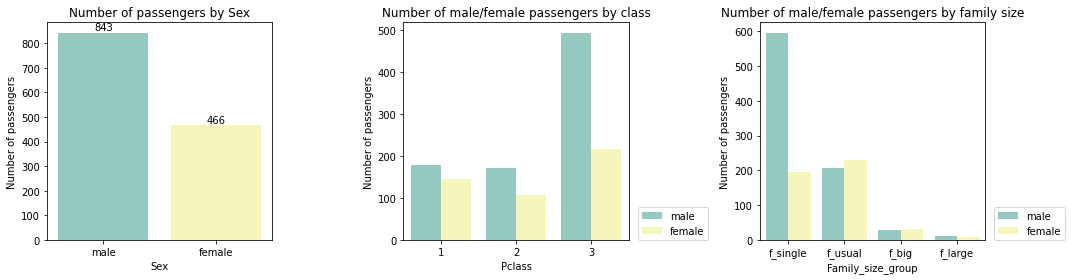

In [148]:
#6.7 Gender
#Let's discover gender a little bit more:
plt.figure(figsize = (15,4))
plt.subplot (1,3,1)
ax = sns.countplot(all_data['Sex'], palette="Set3")
plt.title('Number of passengers by Sex')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Sex'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.subplot (1,3,2)
sns.countplot( x = 'Pclass', data = all_data, hue = 'Sex', palette="Set3")
plt.title('Number of male/female passengers by class')
plt.ylabel('Number of passengers')
plt.legend( loc=(1.04,0))

plt.subplot (1,3,3)
sns.countplot( x = 'Family_size_group', data = all_data, hue = 'Sex', 
              order = all_data['Family_size_group'].value_counts().index , palette="Set3")
plt.title('Number of male/female passengers by family size')
plt.ylabel('Number of passengers')
plt.legend( loc=(1.04,0))
plt.tight_layout()

There were overall more males than females on board, it is fair for each ticket class, but in the 3rd class number of males more than twice bigger than females.
Almost 600 male passengers traveled without family members and only about 200 females, but in usual and big families there were slightly more female passengers.

6.8 Embarked
Titanic had 3 embarkation points before the ship started its route to New York:

Southampton
Cherbourg
Queenstown
Some passengers could leave Titanic in Cherbourg or Queenstown and avoid catastrophe. Also, the point of embarkation could have an influence on ticket fare and location on the ship.

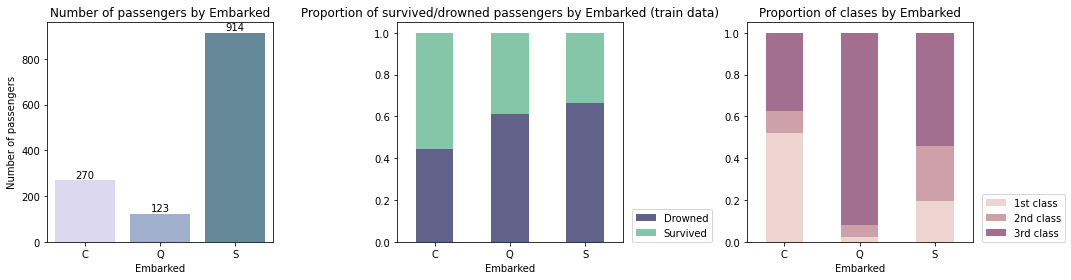

In [149]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
palette = sns.cubehelix_palette(5, start = 2)
ax = sns.countplot(all_data['Embarked'], palette = palette, order = ['C', 'Q', 'S'], ax = ax1)
plt.title('Number of passengers by Embarked')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Embarked'].value_counts())
labels = labels.sort_index()
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

ax2 = fig.add_subplot(132)
surv_by_emb = all_data.groupby('Embarked')['Survived'].value_counts(normalize = True)
surv_by_emb = surv_by_emb.unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Proportion of survived/drowned passengers by Embarked (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax3 = fig.add_subplot(133)
class_by_emb = all_data.groupby('Embarked')['Pclass'].value_counts(normalize = True)
class_by_emb = class_by_emb.unstack().sort_index()
class_by_emb.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax3)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of clases by Embarked')
_ = plt.xticks(rotation=False)

plt.tight_layout()

Most number of passengers (914) were embarked in Southampton. Also Southampton has the biggiest proportion of drowned passengers.
270 passengers emarked in Cherbourg and more than 50% of them survived (in the training dataset).
123 of passengers embarked in Queenstown, the vast majority of them are 3rd class passengers

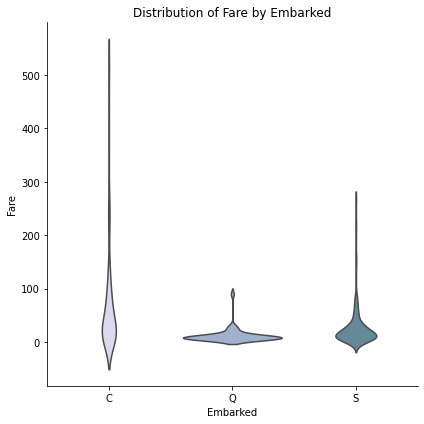

In [150]:
sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=all_data, height = 6, palette = palette, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

In [151]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Embarked')['Fare'].describe())

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,270.0,62.336267,84.185996,4.0125,13.8583,28.51875,78.966675,512.3292
Q,123.0,12.409012,13.616133,6.7500,7.7500,7.75000,10.197900,90.0000
S,913.0,27.418824,37.096402,0.0000,8.0500,13.00000,27.750000,263.0000


The wider fare distribution among passengers who embarked in Cherbourg. It makes scence - many first-class passengers boarded the ship here, but the share of third-class passengers is quite significant.
The smallest variation in the price of passengers who boarded in q. Also, the average price of these passengers is the smallest, I think this is due to the fact that the path was supposed to be the shortest + almost all third-class passengers.
Let's check NA values of Embarked variable:

In [152]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


These two passengers traveled together (same ticket number). To impute missing values, we can use mode value for passengers with the closest fare value and Pclass.

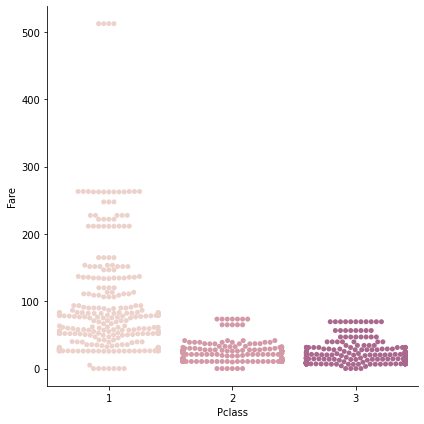

In [153]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=all_data, palette=sns.cubehelix_palette(5, start = 3), height = 6)

plt.tight_layout()

We can observe that the distribution of prices for the second and third class is very similar. The distribution of first-class prices is very different, has a larger spread, and on average prices are higher.

Let's add colours to our points to indicate surviving status of passenger (there will be only data from training part of the dataset):

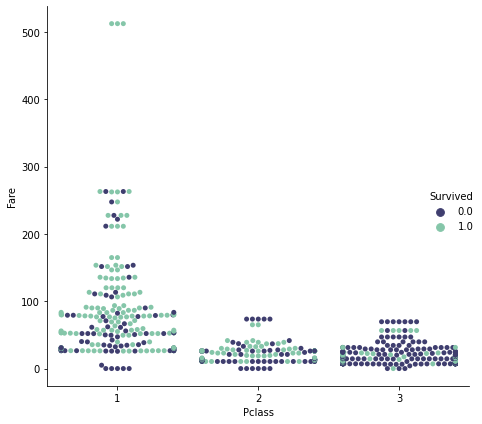

In [154]:
sns.catplot(x="Pclass", y="Fare",  hue = "Survived", kind="swarm", data=all_data, 
                                    palette=["#3f3e6fd1", "#85c6a9"], height = 6)
plt.tight_layout()

Looks like the bigger passenger paid, the more chances to survive he had.
What about zero fare in the first class? Is it a mistake?

In [155]:
all_data[all_data['Fare'] == min(all_data['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname,Family_size_group
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Leonard,f_single
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,Mr,B,1,Harrison,f_single
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Tornquist,f_single
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,Mr,U,1,Parkes,f_single
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Johnson,f_single
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,Mr,U,1,Cunningham,f_single
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,Mr,U,1,Campbell,f_single
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,Mr,U,1,Frost,f_single
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Johnson,f_single
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,Mr,U,1,Parr,f_single


Some of the passengers have "Line" tickets, perhaps they were somehow involved in the Titanic, but were not the ship's crew. I don't think we should change these prices, but add an additional feature for these passengers

7. Conclusion
We know that there were not enough boats on Board the Titanic for all passengers to be able to evacuate. After studying the information about the passengers, we can make some assumptions about who had a better chance of survival in a shipwreck situation as well as General observations about passengers.

There are 891 passengers in the train dataset, 549 (61,6%) of them drowned and only 342 (38,4%) survived. But we know, that lifeboats (16 wooden lifeboats and four collapsible) could carry 53% of total passengers.
The Age of all passengers vary from about 0.17 year to 80 years with average 29.88. The mean age of survived passenger is 28.23 which on 2.39 smaller than the mean age of drowned passengers (only passengers we know survived status for). It looks like there is a slightly bigger chance to survive for younger people.
Exploring the title of passengers, we can see that the biggest proportion of survivors is in the "Mrs" group - a married woman. More than 80% drowned in the "Mr." group and nobody survived among the Reverend group.
Most passengers don't have cabin numbers. The largest part of passengers with known cabin numbers was located on the 'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor.
The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'. Deck A was the closest to the deck with lifeboats, but it is the last in the surviving rate.
The family size on board also seems to have an influence on chances for survival: there were two large families with sizes 8 and 11 and all their members from the training dataset are drowned. We can observe that the percentage of survivors in people who have a family of 2, 3, 4 people is greater than in singles, then the percentage of survivors decreases as the family size increases.
Most of the Titanic's passengers were traveling third class (709). The second class is the smallest in terms of the number of passengers. Despite the previously identified prerequisites (on average, older people are more likely to die, and in the first class, the average age is higher than in other classes. Also, passengers on deck A, which consists of 100% first class, have a large proportion of drowned passengers), the first-class has the largest number of survivors and the proportion of survivors within the class is the largest.
Third-class tickets had the highest number of drowned passengers, and most of the third-class passengers drowned.
However, most of the male passengers of the first class drowned, and the female almost all survived. In the third grade, half of the females survived.
There were overall more males than females on board, it is fair for each ticket class, but in the 3rd class number of males more than twice bigger than females.
Almost 600 male passengers traveled without family members and only about 200 females, but in usual and big families there were slightly more female passengers.
Most numbers of passengers (914) were embarked in Southampton. Also, Southampton has the biggest proportion of drowned passengers. 270 passengers embarked in Cherbourg and more than 50% of them survived (in the training dataset). 123 of passengers embarked in Queenstown, the vast majority of them are 3rd class passengers.
If we use a naive approach and consider all the parameters separately, then young female first-class passengers with the title Mrs have a moderate number of relatives on Board, who paid a large amount for a ticket and went on Board in Cherbourg have a better chance of survival. For sure, there is a relationship between variables, and survival was influenced not only by the title, or ticket, or age itself but by a combination of factors that are to some extent interrelated.
And It is obvious that there is no algorithm that can predict the survival rate by 100 percent based on the factors of the passenger's location on the ship or his age, since the human factor and the unpredicted emergency were involved in the rescue process.

In [156]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [158]:
#to obtain the various column names in the dataset
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [159]:
#to obtain the various column names in the dataset
test.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [160]:
#to obtain the various column names in the dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [161]:
#checking duplicate rows in the dataset. No duplicate in the dataset
train.duplicated().sum()

0

In [162]:
#Checking the type of data contained in each of the column. Survival is Integer type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [163]:
#Checking summary statistics of the data
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [164]:
#Looking for null values . True shows where null values are present, False shows no null value in the dataset
#There 177 missing variables in Age variable, which is one of the predictor variables
#There are 687 missing values in Cabin variable, and just 2 in Embarked variable
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [165]:
type(train['Embarked'])

pandas.core.series.Series